In [154]:
# data analysis
import pandas as pd
import numpy as np
import random as rnd
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [155]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [277]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
combine = [train_df, test_df]

In [157]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [158]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [159]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [160]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [161]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [162]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Flynn, Mr. John",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [163]:
train_df[["Pclass","Survived"]].groupby(by="Pclass").mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [164]:
train_df[["Sex","Survived"]].groupby(by="Sex").mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [165]:
train_df[["Parch","Survived"]].groupby(by="Parch").mean().sort_values(by="Survived", ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


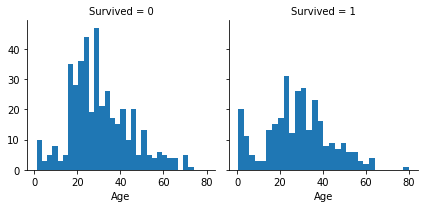

In [166]:
# 연령 분포
grid = sns.FacetGrid(train_df,col="Survived") # 그리드의 column과 row를 지정하는 것.
grid.map(plt.hist, "Age", bins=30) # x="Age" 하면 안됨

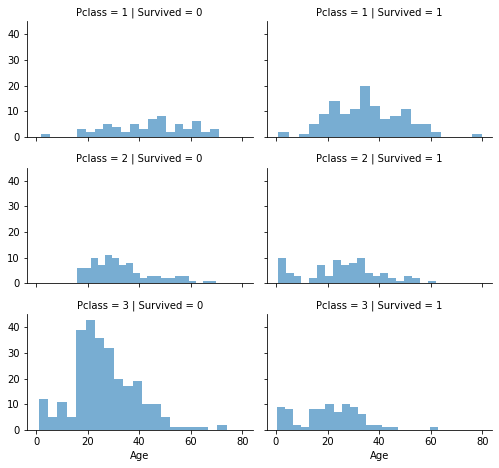

In [167]:
# 조건부 연령 분포
grid = sns.FacetGrid(train_df, col="Survived", row="Pclass", height=2.2, aspect=1.6) # aspect = 넓이
grid.map(plt.hist, "Age", alpha=.6, bins=20) # alpha = 색 선명도  plt.hist
# grid.add_legend();

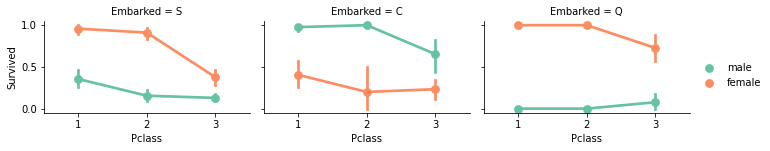

In [168]:
grid = sns.FacetGrid(train_df, col="Embarked", height=2.2, aspect= 1.5)
grid.map(sns.pointplot, "Pclass", "Survived","Sex", palette="Set2", order=None, hue_order=None) # sns.pointplot / palette Set2 예쁘다
grid.add_legend()

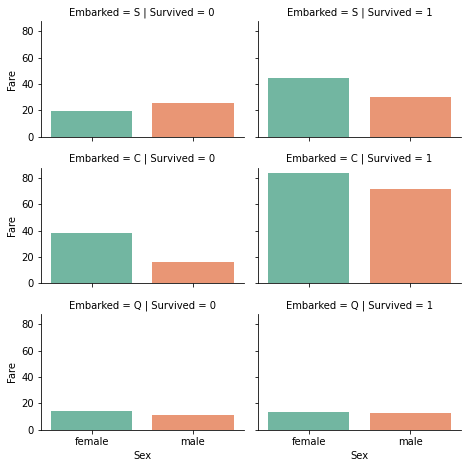

In [169]:
grid = sns.FacetGrid(train_df, row = "Embarked", col="Survived", height=2.2, aspect=1.5)
grid.map(sns.barplot, "Sex", "Fare", palette="Set2", order=None, ci=None) # sns.barplot / ci = None 해줘야 검은 선 안나옴

In [170]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)
train_df = train_df.drop(['Ticket','Cabin'], axis = 1) # axis=1 -> column
test_df = test_df.drop(['Ticket','Cabin'], axis = 1)
combine = [train_df, test_df]
print("After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


In [171]:
combine[0].Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [172]:
for dat in combine:
    dat['Title'] = dat.Name.str.extract(' ([A-Za-z]+)\.', expand=False) # w+\. -> first word which ends with a dot 
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [173]:
for dat in combine:
    dat.Title = dat.Title.replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],"Rare")
    dat['Title'] = dat['Title'].replace('Mlle', 'Miss')
    dat['Title'] = dat['Title'].replace('Ms', 'Miss')
    dat['Title'] = dat['Title'].replace('Mme', 'Mrs')
train_df[['Title','Survived']].groupby(by="Title").mean().sort_values(by="Survived",ascending=False)
# combine이 바뀌면 train도 바뀐다

,Survived
Title,
Mrs,0.793651
Miss,0.702703
Master,0.575000
Rare,0.347826
Mr,0.156673


In [174]:
titlemap = {'Mrs':1,'Miss':2,'Master':3,'Mr':4,'Rare':5}
for dat in combine:
    dat['Title'] = dat['Title'].map(titlemap) # 여기에 map을 쓸 수 있다

In [175]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,4


In [176]:
for dat in combine:
    dat['Title'] = dat['Title'].fillna(0)

In [177]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
print(train_df.shape, test_df.shape)

(891, 9) (418, 9)


In [178]:
for dat in combine:
    dat.Sex = dat.Sex.map({'male':0,'female':1})

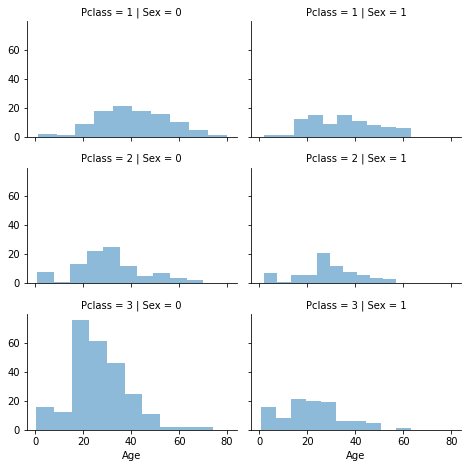

In [179]:
grid = sns.FacetGrid(train_df,row='Pclass',col='Sex', height=2.2, aspect=1.5)
grid.map(plt.hist,"Age",alpha=0.5)

In [180]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [181]:
# AGE 결측치 sex와 Pclass의 median으로 채우기
for dat in combine:
    for i in range(2):
        for j in range(3):
            guess_df = dat[(dat.Sex==i)&(dat.Pclass==j+1)]['Age'].dropna()
            guess_age = guess_df.median()
            guess_ages[i,j] = int(guess_age/0.5 + 0.5 ) * 0.5 ## Convert random age float to nearest .5 age
    
    for i in range(2):
        for j in range(3):
            dat.loc[(dat.Age.isnull()) & (dat.Sex==i) & (dat.Pclass==j+1),'Age'] = guess_ages[i,j] # isnull
    dat['Age']=dat.Age.astype(int)  ## astype

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,4
1,1,1,1,38,1,0,71.2833,C,1
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,1
4,0,3,0,35,0,0,8.0500,S,4


In [182]:
# AgeBand -> pd.cut!!!
train_df['AgeBand'] = pd.cut(train_df['Age'],5) # 5개로 나눠줘
train_df[['AgeBand','Survived']].groupby(by="AgeBand").mean().sort_values(by="AgeBand",ascending=True)

,Survived
AgeBand,
"(-0.08, 16.0]",0.550000
"(16.0, 32.0]",0.337374
"(32.0, 48.0]",0.412037
"(48.0, 64.0]",0.434783
"(64.0, 80.0]",0.090909


In [183]:
for dat in combine:
    dat.loc[dat.Age <= 16, 'Age'] = 0
    dat.loc[(dat.Age > 16) & (dat.Age <=32), 'Age'] = 1
    dat.loc[(dat.Age > 32) & (dat.Age <=48), 'Age'] = 2
    dat.loc[(dat.Age > 48) & (dat.Age <=64), 'Age'] = 3
    dat.loc[dat.Age > 64, 'Age'] = 4
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,4,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,1,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,1,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,4,"(32.0, 48.0]"


In [184]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]

In [185]:
for dat in combine:
    dat['FamilySize'] = dat['SibSp'] + dat['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(by='FamilySize').mean().sort_values(by="Survived", ascending=False)

,Survived
FamilySize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


In [186]:
for dat in combine:
    dat['IsAlone'] = 0
    dat.loc[dat.FamilySize==1,'IsAlone'] = 1
train_df[['IsAlone','Survived']].groupby(by="IsAlone").mean()

,Survived
IsAlone,
0,0.505650
1,0.303538


In [187]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,4,0
1,1,1,1,2,71.2833,C,1,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,1,0
4,0,3,0,2,8.0500,S,4,1


In [190]:
for dat in combine:
    dat['Age*Class'] = dat.Age*dat.Pclass
train_df[['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [191]:
# Embarked 결측치 채우기 with 최빈값
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [192]:
for dat in combine:
    dat['Embarked'] = dat.Embarked.fillna(freq_port)

train_df[['Embarked','Survived']].groupby(by="Embarked").mean().sort_values(by="Survived", ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [196]:
# convert categorical to numerical
for dat in combine:
    dat['Embarked'] = dat['Embarked'].map({'C':0,'Q':1,'S':2}).astype(int) # astype
    
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,2,4,0,3
1,1,1,1,2,71.2833,0,1,0,2
2,1,3,1,1,7.9250,2,2,1,3
3,1,1,1,2,53.1000,2,1,0,2
4,0,3,0,2,8.0500,2,4,1,6


In [197]:
test_df.info() # still missing in Fare

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    int32  
 4   Fare         417 non-null    float64
 5   Embarked     418 non-null    int32  
 6   Title        418 non-null    int64  
 7   IsAlone      418 non-null    int64  
 8   Age*Class    418 non-null    int64  
dtypes: float64(1), int32(2), int64(6)
memory usage: 26.2 KB


In [198]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True) # inplace=True

In [202]:
train_df['FareBand'] = pd.qcut(train_df['Fare'],4) # pd.cut 와 pd.qcut의 차이 -> 숫자대로 짜르냐 quantile대로 짜르냐
train_df[['FareBand','Survived']].groupby(by='FareBand').mean()

,Survived
FareBand,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [203]:
for dat in combine:
    dat.loc[dat['Fare'] <= 7.91, 'Fare'] = 0
    dat.loc[(dat['Fare'] > 7.91) & (dat['Fare'] <= 14.454), 'Fare'] = 1
    dat.loc[(dat['Fare'] > 14.454) & (dat['Fare'] <= 31.0), 'Fare'] = 2
    dat.loc[(dat['Fare'] > 31.0) & (dat['Fare'] <= 512.329), 'Fare'] = 3
    
train_df = train_df.drop('FareBand', axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0.0,2,4,0,3
1,1,1,1,2,3.0,0,1,0,2
2,1,3,1,1,1.0,2,2,1,3
3,1,1,1,2,3.0,2,1,0,2
4,0,3,0,2,1.0,2,4,1,6


In [204]:
for dat in combine:
    dat['Fare'] = dat['Fare'].astype(int) # int로 바꿔줘야 .0 없앤다

In [205]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,1,4,1,6
1,893,3,1,2,0,2,1,0,6
2,894,2,0,3,1,1,4,1,6
3,895,3,0,1,1,2,4,1,3
4,896,3,1,1,1,2,1,0,3


In [206]:
# Modeling

In [238]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df.Survived
X_test = test_df.drop("PassengerId", axis=1)
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [257]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train)*100,2)
acc_log

80.36

In [233]:
coeff_df = pd.DataFrame(X_train.columns)
coeff_df.columns = ['Feature'] # column index 들의 column을 설정!
coeff_df["Correlation"] = pd.Series(logreg.coef_[0]) # logreg.coef_ 에서 [0] 무조건 해줘야 list처럼 반환됨

In [234]:
coeff_df.sort_values(by="Correlation", ascending=False)

,Feature,Correlation
1,Sex,0.618628
6,IsAlone,0.435869
3,Fare,0.009796
7,Age*Class,-0.166545
2,Age,-0.265419
4,Embarked,-0.273382
5,Title,-0.924747
0,Pclass,-1.030219


In [258]:
# SVC
from sklearn.svm import SVC
svc= SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train)*100, 2)
acc_svc

79.12

In [259]:
# Linear SVC
from sklearn.svm import LinearSVC
linear_svc = LinearSVC(max_iter=100000)
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train)*100,2)
acc_linear_svc

C:\Users\Erin Lee\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


79.8

In [260]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train)*100, 2)
acc_knn

85.19

In [261]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train)*100,2)
acc_gaussian

76.32

In [262]:
# Stochastic Gradient Descent Classifier
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train)*100,2)
acc_sgd

70.59

In [263]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)
Y_pred = tree.predict(X_test)
acc_tree = round(tree.score(X_train, Y_train)*100, 2)
acc_tree

86.76

In [285]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state = 2)
clf.fit(X_train,Y_train)
y_pred = (clf.predict_proba(X_test)[:,1] >= 0.3).astype(int)

In [288]:
import numpy as np
y_pred = (clf.predict_proba(X_train)[:,1] >= 0.3).astype(int)
acc=np.mean(Y_train==y_pred)
acc

0.856341189674523

In [286]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [264]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)
acc_rf = round(tree.score(X_train, Y_train)*100, 2)
acc_rf

86.76

In [265]:
models = pd.DataFrame({
    'Model': ['SVM', 'linear SVM','Logistic Regression','KNN','SGD','Decision Tree','Random Forest', 'Naive Bayesian'],
    'Score': [acc_svc, acc_linear_svc, acc_log, acc_knn, acc_sgd, acc_tree, acc_rf, acc_gaussian]
})

models.sort_values(by='Score', ascending=False)

,Model,Score
5,Decision Tree,86.76
6,Random Forest,86.76
3,KNN,85.19
2,Logistic Regression,80.36
1,linear SVM,79.80
0,SVM,79.12
7,Naive Bayesian,76.32
4,SGD,70.59


In [269]:
# submission
submission = pd.DataFrame({"PassengerId": test_df["PassengerId"],
                          "Survived": Y_pred})
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [273]:
submission.to_csv("submission_by_erin.csv", header=True, index=False) # index!!

In [272]:
help(pd.DataFrame.to_csv, header=True, index=False)

Help on function to_csv in module pandas.core.generic:

to_csv(self, path_or_buf: Union[str, pathlib.Path, IO[~AnyStr], NoneType] = None, sep: str = ',', na_rep: str = '', float_format: Union[str, NoneType] = None, columns: Union[Sequence[Union[Hashable, NoneType]], NoneType] = None, header: Union[bool, List[str]] = True, index: bool = True, index_label: Union[bool, str, Sequence[Union[Hashable, NoneType]], NoneType] = None, mode: str = 'w', encoding: Union[str, NoneType] = None, compression: Union[str, Mapping[str, str], NoneType] = 'infer', quoting: Union[int, NoneType] = None, quotechar: str = '"', line_terminator: Union[str, NoneType] = None, chunksize: Union[int, NoneType] = None, date_format: Union[str, NoneType] = None, doublequote: bool = True, escapechar: Union[str, NoneType] = None, decimal: Union[str, NoneType] = '.', errors: str = 'strict') -> Union[str, NoneType]
    Write object to a comma-separated values (csv) file.
    
    .. versionchanged:: 0.24.0
        The order 